In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
import os
import random

In [3]:
from PIL import Image
from numpy import asarray

In [4]:
DIR_TRAIN = "./train_birds"

In [5]:
# clss_spl=3
# clss_num=3

In [6]:
# classes = os.listdir(DIR_TRAIN)
# classes = classes[::clss_spl]
# classes

In [7]:
# sel_classes=[]
# for clss in range(clss_num):
#     class_drawn=np.random.choice(classes)
#     sel_classes.append(class_drawn)
# print(sel_classes)

In [8]:
num_draw=3
classes = os.listdir(DIR_TRAIN)
classes=np.random.choice(classes,num_draw)
classes

array(['BLACK VULTURE', 'TREE SWALLOW', 'TOWNSENDS WARBLER'], dtype='<U25')

In [9]:
cnt_tr=40
cnt_ts_lo=60
cnt_ts_hi=70

In [10]:
%%time
def extract(classes,cnt_tr,cnt_ts_lo, cnt_ts_hi):

    train_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img
#             print(s)
            image = Image.open(s).convert("L")
            # convert image to numpy array
            img_np = asarray(image)
            train_imgs.append(img_np)
    
    test_imgs = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:             
                s=DIR_TRAIN + '/' + _class+'/'+img
#                 print(s)
                image = Image.open(s).convert("L")
                # convert image to numpy array
                img_np = asarray(image)
                test_imgs.append(img_np) 
    
    act_tr=np.array(train_imgs)
    print(act_tr.shape)
    train_np=act_tr.reshape(act_tr.shape[0],-1)/255.
    print("train images shape:",train_np.shape)
    
    act_ts=np.array(test_imgs)
    test_np=act_ts.reshape(act_ts.shape[0],-1)/255.
    print("test images shape:",test_np.shape)
    
    
    train_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i==cnt_tr:
                break
            s=DIR_TRAIN + '/' + _class+'/'+img
            label = s.split("/")[-2]
            train_lbls.append(label)
#             print(label)
            
    
    test_lbls = []
    for _class in classes:
        for i,img in enumerate(os.listdir(DIR_TRAIN + '/' + _class)):
            if i<cnt_ts_lo:
                continue
            elif i>=cnt_ts_hi:
                break        
            else:  
                s=DIR_TRAIN + '/' + _class+'/'+img
                label = s.split("/")[-2]
                test_lbls.append(label)
#                 print("test",label)
            
    
    classes_2int = {classes[i]: i for i in range(len(classes))}
    print("Number of Classes:",len(classes_2int))
    
    
    train_lbls_int=[classes_2int.get(train_lbls[i]) for i in range(len(train_lbls))]
    train_lbls_int=np.array(train_lbls_int)
    print("Number of Training Labels:",len(train_lbls_int))
    
    test_lbls_int=[classes_2int.get(test_lbls[i]) for i in range(len(test_lbls))]
    test_lbls_int=np.array(test_lbls_int)
    print("Number of Testing Labels:",len(test_lbls_int))
    
    return train_np,test_np,train_lbls_int, test_lbls_int , act_tr, act_ts        
    

Wall time: 0 ns


In [11]:
train_imgs,test_imgs,train_lbls_int, test_lbls_int, act_tr, act_ts =extract(classes,cnt_tr, cnt_ts_lo, cnt_ts_hi)

(120, 224, 224)
train images shape: (120, 50176)
test images shape: (30, 50176)
Number of Classes: 3
Number of Training Labels: 120
Number of Testing Labels: 30


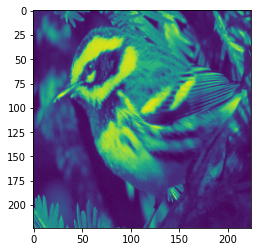

In [12]:
plt.imshow(act_tr[np.random.choice(act_tr.shape[0], replace=False) ])

In [13]:
n_pixels = train_imgs.shape[1]
# Upper half of the faces
X_train = train_imgs[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train_imgs[:, n_pixels // 2:]
X_test = test_imgs[:, :(n_pixels + 1) // 2]
y_test = test_imgs[:, n_pixels // 2:]

In [14]:
KNN=KNeighborsRegressor()

In [15]:
y_pred = dict()

KNN.fit(X_train, y_train)
y_pred[KNN] = KNN.predict(X_test)

In [16]:
np.random.choice(X_test.shape[0], 3, replace=False) 

array([26,  5, 22])

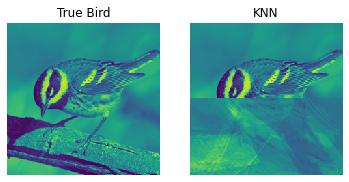

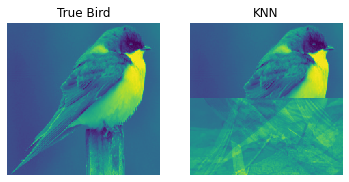

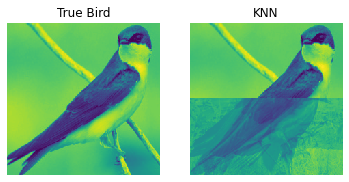

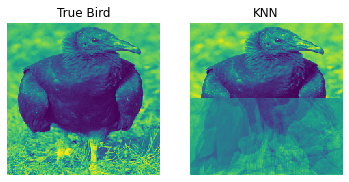

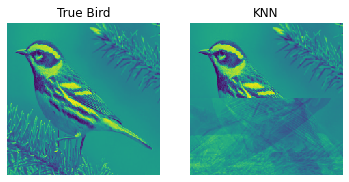

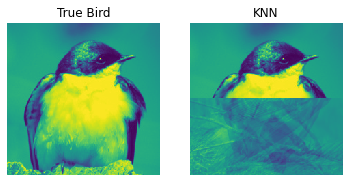

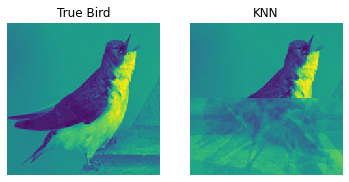

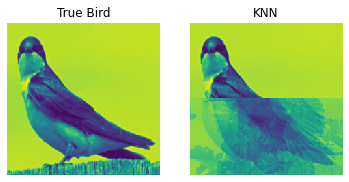

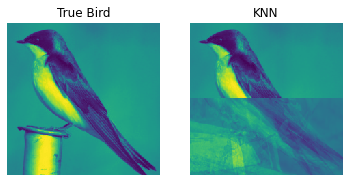

In [17]:
n=9
# i=9
rnd_drawn=np.random.choice(X_test.shape[0], n, replace=False) 
for i in rnd_drawn:
    true_bird = np.hstack((X_test[i], y_test[i]))
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)
    plt.axis("off")
    imgplot = plt.imshow(true_bird.reshape(act_tr.shape[1],act_tr.shape[2]),
                   cmap=plt.cm.viridis,
                   interpolation="nearest")
    ax.set_title('True Bird')

    completed_bird = np.hstack((X_test[i], y_pred[KNN][i]))
    ax = fig.add_subplot(1, 2, 2)
    plt.axis("off")
    imgplot = plt.imshow(completed_bird.reshape(act_tr.shape[1],act_tr.shape[2]),
                   cmap=plt.cm.viridis,
                   interpolation="nearest")

    ax.set_title('KNN')